# Challenge 3: Fundamentals of Prompt Engineering & Evaluation

In this challenge, we'll explore core principles of effective prompt engineering, focusing on practical techniques for crafting prompts and evaluating them using Microsoft's tools. We'll also learn how to evaluate and refine prompts using quantitative metrics.

## 1. Core Principles of Effective Prompt Crafting

Effective prompts follow these key principles:

1. **Role & Context Setting**: Define the AI's role and provide context for the task
2. **Clear Instructions**: Provide specific, unambiguous directions
3. **Input/Output Format Specification**: Clearly define how to format inputs and expected outputs
4. **Few-Shot Examples**: Provide examples demonstrating desired input/output patterns
5. **Chain-of-Thought Prompting**: Guide the model through a reasoning process
6. **System vs User Prompts**: Utilize system prompts for personality and user prompts for specific requests

## 2. Setting up Our Environment

First, let's install the necessary packages for our prompt engineering and evaluation work:

In [20]:
!pip install openai python-dotenv numpy pandas matplotlib azure-ai-evaluation

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.8/583.8 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 406.9/406.9 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.9/987.9 kB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 91.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 84.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━

In [21]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from openai import AsyncAzureOpenAI

# Load environment variables
load_dotenv()

# Set up AsyncOpenAI client with Azure credentials
client = AsyncAzureOpenAI(
    azure_endpoint=os.getenv('AZURE_OPENAI_ENDPOINT'),
    azure_deployment=os.getenv('AZURE_OPENAI_DEPLOYMENT'),
    api_key=os.getenv('AZURE_OPENAI_KEY'),
    api_version = "2024-12-01-preview"
)

## 3. Interactive Prompt Development

Let's set up a function to test our prompts interactively:

In [22]:
async def get_completion(prompt, system_prompt="You are a helpful assistant.", temperature=0.7):
    """Get a completion from the OpenAI API"""
    response = await client.chat.completions.create(
        model="gpt-4o-mini",  # You can change this to your preferred model
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": prompt}
        ],
        temperature=temperature,
    )
    return response.choices[0].message.content

## 4. Prompt Scenarios: Research Assistant

Let's create a prompt for a research assistant that summarizes academic papers:

In [23]:
research_paper = """
Title: Deep Reinforcement Learning for Autonomous Driving: A Survey
Authors: B. R. Kiran, I. Sobh, V. Talpaert, P. Mannion, A. A. Al Sallab, S. Yogamani, P. Pérez

Abstract: The field of autonomous driving has seen substantial progress in recent years, largely due to advances in deep learning for perception tasks such as object detection and semantic segmentation. However, designing a reliable autonomous driving system that can operate safely in all conditions remains a challenge. Deep reinforcement learning (DRL) offers a promising framework for addressing complex decision-making tasks in autonomous driving, as it allows systems to learn from experience and improve over time. In this paper, we provide a comprehensive survey of DRL methods applied to autonomous driving. We begin by covering the fundamentals of DRL, including Markov decision processes, deep Q-networks, policy gradient methods, and actor-critic approaches. We then categorize existing literature based on the specific autonomous driving tasks being addressed, such as lane keeping, intersection navigation, and highway merging. We also examine different training approaches, including simulation-based training, real-world training, and transfer learning. Finally, we discuss key challenges and future research directions in applying DRL to autonomous driving, such as safety guarantees, explainability, and data efficiency.

Introduction:
Autonomous driving has emerged as one of the most challenging and impactful applications of artificial intelligence and robotics. The development of fully autonomous vehicles promises to revolutionize transportation by improving safety, reducing congestion, and enhancing mobility for all. While significant progress has been made in perception systems for autonomous driving, decision-making remains a critical challenge, especially in complex, dynamic environments with multiple actors.

Deep reinforcement learning (DRL) has shown remarkable success in domains requiring sequential decision-making, such as game playing and robotic control. DRL combines the representation learning capabilities of deep neural networks with the trial-and-error learning paradigm of reinforcement learning, allowing systems to learn complex behaviors through interaction with their environment. This makes DRL particularly well-suited for autonomous driving, where vehicles must make a sequence of decisions based on high-dimensional sensory inputs and learn from the consequences of those decisions.
"""

# Basic prompt without engineering techniques
basic_prompt = f"Summarize this research paper: {research_paper}"

# Engineered prompt using best practices
engineered_prompt = f"""
You are a research assistant helping a computer science professor understand recent publications in AI. 

Please analyze the following research paper and create a structured summary with these components:
1. Core research question/objective (1-2 sentences)
2. Key methodologies used (2-3 bullet points)
3. Main contributions/findings (3-4 bullet points)
4. Limitations or challenges mentioned (1-2 bullet points)
5. Potential applications and future work (1-2 sentences)

Format your response with clear headings and concise language suitable for an academic audience familiar with AI concepts but not specialized in this particular subdomain.

PAPER TO SUMMARIZE:
{research_paper}
"""

# Get completions
basic_summary = await get_completion(basic_prompt)
engineered_summary = await get_completion(engineered_prompt)

print("==== BASIC PROMPT SUMMARY ====\n")
print(basic_summary)
print("\n\n==== ENGINEERED PROMPT SUMMARY ====\n")
print(engineered_summary)

==== BASIC PROMPT SUMMARY ====

The research paper titled "Deep Reinforcement Learning for Autonomous Driving: A Survey" by B. R. Kiran et al. provides an in-depth overview of the application of deep reinforcement learning (DRL) in the field of autonomous driving. The authors highlight the significant advancements in perception tasks, such as object detection and semantic segmentation, but emphasize that safe and reliable autonomous driving systems still face challenges, particularly in complex decision-making scenarios.

The paper begins by explaining the fundamentals of DRL, including concepts like Markov decision processes, deep Q-networks, policy gradient methods, and actor-critic approaches. It categorizes existing literature based on specific driving tasks, such as lane keeping, intersection navigation, and highway merging. Additionally, the authors review various training methodologies, including simulation-based training, real-world training, and transfer learning.

The survey 

## 5. Few-Shot Learning Example: Code Reviewer

Next, let's create a code reviewer prompt using few-shot examples:

In [29]:
code_to_review = """
def calculate_average(numbers):
    total = 0
    for num in numbers:
        total += num
    return total / len(numbers)

def find_max(numbers):
    max_val = numbers[0]
    for num in numbers:
        if num > max_val:
            max_val = num
    return max_val

def process_data(data):
    results = []
    for item in data:
        if len(item) > 0:
            results.append(calculate_average(item))
        else:
            results.append(0)
    return results
"""

In [30]:
# Few-shot code review prompt
code_review_prompt = r"""
You are an expert code reviewer who provides constructive feedback on Python code. 
Your goal is to help developers improve code quality, readability, and robustness.

Here are examples of the kind of reviews you provide:

EXAMPLE 1:
```python
def add_numbers(a, b):
    return a + b
```
REVIEW:
✅ Good: Function is concise and has a clear purpose
⚠️ Improvement: Missing input validation - what if non-numeric types are passed?
⚠️ Improvement: Missing docstring explaining function purpose and parameters
Suggested rewrite:
```python
def add_numbers(a: float, b: float) -> float:
    \"""Add two numbers and return the result.
    
    Args:
        a: First number
        b: Second number
        
    Returns:
        Sum of the two input numbers
    \"""
    if not (isinstance(a, (int, float)) and isinstance(b, (int, float))):
        raise TypeError("Both inputs must be numeric types")
    return a + b
```

EXAMPLE 2:
```python
def get_user_info(user_id):
    users = {1: {"name": "Alice", "email": "alice@example.com"},
             2: {"name": "Bob", "email": "bob@example.com"}}
    return users[user_id]
```
REVIEW:
✅ Good: Function has a clear purpose
❌ Issue: No error handling for missing user IDs
❌ Issue: Hard-coded user data inside the function
⚠️ Improvement: Missing type hints and docstring
Suggested rewrite:
```python
def get_user_info(user_id: int, users: dict = None) -> dict:
    \"""Retrieve user information by user ID.
    
    Args:
        user_id: The ID of the user to look up
        users: Dictionary mapping user IDs to user data
        
    Returns:
        Dictionary containing user information
        
    Raises:
        KeyError: If the user_id is not found
    \"""
    if users is None:
        users = {1: {"name": "Alice", "email": "alice@example.com"},
                 2: {"name": "Bob", "email": "bob@example.com"}}
    try:
        return users[user_id]
    except KeyError:
        raise KeyError(f"User ID {user_id} not found")
```

Now, please review the following Python code:

```python
""" + code_to_review + r"""
```

Provide a detailed code review following the format of the examples above.
"""

code_review = await get_completion(code_review_prompt)
print(code_review)




REVIEW:

### `calculate_average(numbers)`

✅ Good: The function has a clear purpose and is straightforward.

❌ Issue: No error handling for empty lists - this will raise a `ZeroDivisionError`.

⚠️ Improvement: Missing type hints and docstring.

Suggested rewrite:
```python
def calculate_average(numbers: list) -> float:
    """Calculate the average of a list of numbers.

    Args:
        numbers: A list of numeric values.

    Returns:
        The average of the numbers in the list.

    Raises:
        ValueError: If the input list is empty.
    """
    if not numbers:
        raise ValueError("The input list must not be empty")

    total = sum(numbers)
    return total / len(numbers)
```

### `find_max(numbers)`

✅ Good: The function has a clear purpose and correctly identifies the maximum value.

❌ Issue: No error handling for empty lists - this will raise an `IndexError`.

⚠️ Improvement: Missing type hints and docstring.

Suggested rewrite:
```python
def find_max(numbers: list) -

## 6. Chain-of-Thought Prompting: Data Analysis

Now let's explore chain-of-thought prompting for a data analysis task:

In [31]:
data_table = """
| Month | Product A Sales | Product B Sales | Product C Sales | Marketing Spend |
|-------|-----------------|-----------------|-----------------|------------------|
| Jan   | 120,000         | 45,000          | 32,000          | 15,000          |
| Feb   | 125,000         | 42,000          | 36,000          | 15,000          |
| Mar   | 130,000         | 48,000          | 39,000          | 16,000          |
| Apr   | 135,000         | 50,000          | 58,000          | 25,000          |
| May   | 140,000         | 52,000          | 72,000          | 30,000          |
| Jun   | 142,000         | 53,000          | 85,000          | 32,000          |
"""

# Standard prompt
standard_analysis_prompt = f"""
Analyze this sales data and provide insights:

{data_table}
"""

# Chain-of-thought prompt
cot_analysis_prompt = f"""
You are a data analyst helping a marketing team understand product performance.

Please analyze the following sales data table:

{data_table}

To provide a comprehensive analysis, please:

1. First, calculate the total sales for each product over the 6-month period.
2. Next, calculate the month-over-month growth rate for each product.
3. Then, analyze the correlation between marketing spend and sales for each product.
4. Compare the performance of the three products and identify which one shows the most promising trend.
5. Finally, provide 3 specific, data-backed recommendations for where the marketing team should focus their efforts.

For each step, show your reasoning and calculations before moving to the next step.
Conclude with a concise executive summary of your findings and recommendations.
"""

standard_analysis = await get_completion(standard_analysis_prompt)
cot_analysis = await get_completion(cot_analysis_prompt)

print("==== STANDARD ANALYSIS ====\n")
print(standard_analysis)
print("\n\n==== CHAIN-OF-THOUGHT ANALYSIS ====\n")
print(cot_analysis)

==== STANDARD ANALYSIS ====

Based on the sales data provided for Products A, B, and C along with the marketing spend from January to June, several insights can be drawn:

### Sales Trends
1. **Product A**: 
   - Sales have shown a consistent upward trend over the six-month period, increasing from $120,000 in January to $142,000 in June. This represents an increase of approximately 18.3%.
   - The growth appears to be steady, with an average monthly increase of about $3,500.

2. **Product B**:
   - Sales for Product B have fluctuated slightly, starting at $45,000 in January and ending at $53,000 in June. 
   - The overall increase is about 17.8%, which is a slower growth rate compared to Product A.
   - The month-to-month changes are minimal, indicating that Product B may require more marketing efforts or a different strategy to boost sales.

3. **Product C**:
   - Product C has experienced the most significant growth in sales, jumping from $32,000 in January to $85,000 in June, which 

## 7. Evaluation with Azure AI Evaluation SDK

Now let's explore Microsoft's Azure AI Evaluation SDK to evaluate our prompts:

In [32]:
# Import the Azure AI Evaluation SDK
from azure.ai.evaluation import RelevanceEvaluator, FluencyEvaluator, CoherenceEvaluator

# Configure the model for evaluation
model_config = {
    "azure_endpoint": os.getenv("AZURE_OPENAI_ENDPOINT"),
    "api_key": os.getenv("AZURE_OPENAI_KEY"),
    "azure_deployment": os.getenv("AZURE_OPENAI_DEPLOYMENT"),
    "api_version": "2024-12-01-preview"
}

/home/vscode/.local/lib/python3.11/site-packages/sqlalchemy/util/_concurrency_py3k.py:24: RuntimeWarning: coroutine 'AsyncCompletions.create' was never awaited
  from .langhelpers import memoized_property


### Evaluating Research Assistant Summaries

In [35]:
# Initialize evaluators
relevance_evaluator = RelevanceEvaluator(model_config)
fluency_evaluator = FluencyEvaluator(model_config)
coherence_evaluator = CoherenceEvaluator(model_config)

# Evaluate basic summary
basic_relevance = relevance_evaluator(
    query="Summarize this research paper on deep reinforcement learning for autonomous driving",
    ground_truth=research_paper,
    response=basic_summary
)

basic_fluency = fluency_evaluator(
    response=basic_summary
)

basic_coherence = coherence_evaluator(
    conversation={
        "messages": [
            {"role": "user", "content": "Summarize this research paper on deep reinforcement learning for autonomous driving"},
            {"role": "assistant", "content": basic_summary}
        ]
    }
)

# Evaluate engineered summary
engineered_relevance = relevance_evaluator(
    query="Summarize this research paper on deep reinforcement learning for autonomous driving with a structured format",
    ground_truth=research_paper,
    response=engineered_summary
)

engineered_fluency = fluency_evaluator(
    response=engineered_summary
)

engineered_coherence = coherence_evaluator(
    conversation={
        "messages": [
            {"role": "user", "content": "Summarize this research paper on deep reinforcement learning for autonomous driving with a structured format"},
            {"role": "assistant", "content": engineered_summary}
        ]
    }
)

# Print evaluation results
print("Basic Summary Evaluation:")
print(f"- Relevance: {basic_relevance}")
print(f"- Fluency: {basic_fluency}")
print(f"- Coherence: {basic_coherence}")
print("\nEngineered Summary Evaluation:")
print(f"- Relevance: {engineered_relevance}")
print(f"- Fluency: {engineered_fluency}")
print(f"- Coherence: {engineered_coherence}")

Basic Summary Evaluation:
- Relevance: {'relevance': 5.0, 'gpt_relevance': 5.0, 'relevance_reason': 'The RESPONSE fully addresses the QUERY by summarizing the research paper accurately and completely, while also providing additional insights about the challenges and future directions in the field of deep reinforcement learning for autonomous driving. This makes it a comprehensive response.'}
- Fluency: {'fluency': 4.0, 'gpt_fluency': 4.0, 'fluency_reason': 'The RESPONSE demonstrates a high level of fluency with well-structured sentences, good grammar, and a clear conveyance of complex ideas, fitting the criteria for Proficient Fluency. It does not exhibit the exceptional qualities needed for a higher score.'}
- Coherence: {'coherence': 5.0, 'gpt_coherence': 5.0, 'coherence_reason': 'The RESPONSE effectively summarizes the research paper, presenting ideas in a logical order with clear connections between them. It thoroughly addresses the QUERY, demonstrating a high level of coherence.'}

### Visualizing Evaluation Results

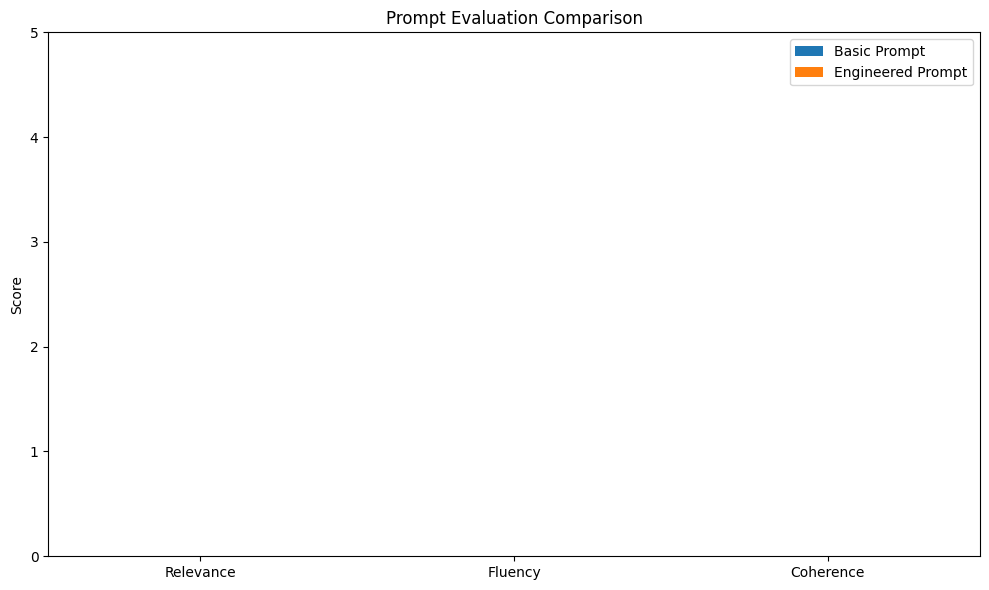

In [37]:
def visualize_evaluation(basic_scores, engineered_scores, metrics):
    """Create a bar chart comparing evaluation scores"""
    x = np.arange(len(metrics))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, basic_scores, width, label='Basic Prompt')
    ax.bar(x + width/2, engineered_scores, width, label='Engineered Prompt')
    
    ax.set_ylim(0, 5)
    ax.set_ylabel('Score')
    ax.set_title('Prompt Evaluation Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Extract scores
basic_scores = [basic_relevance.get('score', 0), basic_fluency.get('score', 0), basic_coherence.get('score', 0)]
engineered_scores = [engineered_relevance.get('score', 0), engineered_fluency.get('score', 0), engineered_coherence.get('score', 0)]
metrics = ['Relevance', 'Fluency', 'Coherence']

visualize_evaluation(basic_scores, engineered_scores, metrics)

## 8. Batch Evaluation with Multiple Prompts

Now let's evaluate multiple prompts using the Azure AI Evaluation SDK's batch evaluation capabilities:

In [38]:
from azure.ai.evaluation import evaluate
import json

# Create a sample dataset for evaluation
evaluation_data = [
    {
        "query": "Summarize this research paper",
        "ground_truth": research_paper,
        "response_basic": basic_summary,
        "response_engineered": engineered_summary
    },
    {
        "query": "Review this Python code",
        "ground_truth": code_to_review,
        "response_basic": await get_completion(f"Review this Python code: {code_to_review}"),
        "response_engineered": code_review
    },
    {
        "query": "Analyze this sales data",
        "ground_truth": data_table,
        "response_basic": standard_analysis,
        "response_engineered": cot_analysis
    }
]

# Write data to a JSONL file
with open('evaluation_data.jsonl', 'w') as f:
    for item in evaluation_data:
        f.write(json.dumps(item) + '\n')

# Set up evaluators
evaluators = {
    "relevance": relevance_evaluator,
    "coherence": coherence_evaluator,
    "fluency": fluency_evaluator
}

# Run evaluation for basic responses
basic_results = evaluate(
    data="evaluation_data.jsonl",
    evaluators=evaluators,
    evaluator_config={
        "default": {
            "column_mapping": {
                "query": "${data.query}",
                "ground_truth": "${data.ground_truth}",
                "response": "${data.response_basic}"
            }
        }
    },
    output_path="basic_evaluation_results.json"
)

# Run evaluation for engineered responses
engineered_results = evaluate(
    data="evaluation_data.jsonl",
    evaluators=evaluators,
    evaluator_config={
        "default": {
            "column_mapping": {
                "query": "${data.query}",
                "ground_truth": "${data.ground_truth}",
                "response": "${data.response_engineered}"
            }
        }
    },
    output_path="engineered_evaluation_results.json"
)

# Display results
print("Basic Prompt Evaluation Summary:")
for metric, value in basic_results.get('summary').items():
    print(f"{metric}: {value}")

print("\nEngineered Prompt Evaluation Summary:")
for metric, value in engineered_results.get('summary').items():
    print(f"{metric}: {value}")

[2025-03-18 19:18:59 +0000][promptflow._core.entry_meta_generator][WARNING] - Generate meta in current process and timeout won't take effect. Please handle timeout manually outside current process.
[2025-03-18 19:18:59 +0000][promptflow._sdk._orchestrator.run_submitter][INFO] - Submitting run azure_ai_evaluation_evaluators_common_base_eval_asyncevaluatorbase_lsvwy698_20250318_191859_640440, log path: /home/vscode/.promptflow/.runs/azure_ai_evaluation_evaluators_common_base_eval_asyncevaluatorbase_lsvwy698_20250318_191859_640440/logs.txt
[2025-03-18 19:18:59 +0000][promptflow._core.entry_meta_generator][WARNING] - Generate meta in current process and timeout won't take effect. Please handle timeout manually outside current process.
[2025-03-18 19:18:59 +0000][promptflow._core.entry_meta_generator][WARNING] - Generate meta in current process and timeout won't take effect. Please handle timeout manually outside current process.
[2025-03-18 19:18:59 +0000][promptflow._sdk._orchestrator.run

2025-03-18 19:18:59 +0000   46346 execution.bulk     INFO     Current thread is not main thread, skip signal handler registration in BatchEngine.
2025-03-18 19:19:01 +0000   46346 execution.bulk     INFO     Finished 1 / 3 lines.
2025-03-18 19:19:01 +0000   46346 execution.bulk     INFO     Average execution time for completed lines: 1.86 seconds. Estimated time for incomplete lines: 3.72 seconds.
2025-03-18 19:19:01 +0000   46346 execution.bulk     INFO     Finished 2 / 3 lines.
2025-03-18 19:19:01 +0000   46346 execution.bulk     INFO     Average execution time for completed lines: 0.97 seconds. Estimated time for incomplete lines: 0.97 seconds.
2025-03-18 19:19:02 +0000   46346 execution.bulk     INFO     Finished 3 / 3 lines.
2025-03-18 19:19:02 +0000   46346 execution.bulk     INFO     Average execution time for completed lines: 0.99 seconds. Estimated time for incomplete lines: 0.0 seconds.
======= Run Summary =======

Run name: "azure_ai_evaluation_evaluators_common_base_eval_as

[2025-03-18 19:19:04 +0000][promptflow._core.entry_meta_generator][WARNING] - Generate meta in current process and timeout won't take effect. Please handle timeout manually outside current process.
[2025-03-18 19:19:04 +0000][promptflow._sdk._orchestrator.run_submitter][INFO] - Submitting run azure_ai_evaluation_evaluators_common_base_eval_asyncevaluatorbase_ahwwneqn_20250318_191904_842034, log path: /home/vscode/.promptflow/.runs/azure_ai_evaluation_evaluators_common_base_eval_asyncevaluatorbase_ahwwneqn_20250318_191904_842034/logs.txt
[2025-03-18 19:19:04 +0000][promptflow._core.entry_meta_generator][WARNING] - Generate meta in current process and timeout won't take effect. Please handle timeout manually outside current process.
[2025-03-18 19:19:04 +0000][promptflow._sdk._orchestrator.run_submitter][INFO] - Submitting run azure_ai_evaluation_evaluators_common_base_eval_asyncevaluatorbase_fpvubi_q_20250318_191904_839492, log path: /home/vscode/.promptflow/.runs/azure_ai_evaluation_ev

2025-03-18 19:18:59 +0000   46346 execution.bulk     INFO     Current thread is not main thread, skip signal handler registration in BatchEngine.
2025-03-18 19:19:02 +0000   46346 execution.bulk     INFO     Finished 1 / 3 lines.
2025-03-18 19:19:02 +0000   46346 execution.bulk     INFO     Average execution time for completed lines: 2.65 seconds. Estimated time for incomplete lines: 5.3 seconds.
2025-03-18 19:19:03 +0000   46346 execution.bulk     INFO     Finished 2 / 3 lines.
2025-03-18 19:19:03 +0000   46346 execution.bulk     INFO     Average execution time for completed lines: 2.12 seconds. Estimated time for incomplete lines: 2.12 seconds.
2025-03-18 19:19:03 +0000   46346 execution.bulk     INFO     Finished 3 / 3 lines.
2025-03-18 19:19:04 +0000   46346 execution.bulk     INFO     Average execution time for completed lines: 1.42 seconds. Estimated time for incomplete lines: 0.0 seconds.
======= Run Summary =======

Run name: "azure_ai_evaluation_evaluators_common_base_eval_asy

AttributeError: 'NoneType' object has no attribute 'items'

## 9. Key Takeaways and Best Practices

Based on our experiments with prompt engineering and evaluation, here are the key takeaways:

1. **Clear Role Definition**: Defining the AI's role significantly improves response quality
2. **Structured Formatting**: Requesting specific output formats produces more organized, usable outputs
3. **Few-Shot Examples**: Providing examples dramatically improves the model's ability to follow patterns
4. **Chain-of-Thought**: Guiding the model through a reasoning process improves analytical outputs
5. **Quantitative Evaluation**: Using consistent metrics helps identify areas for improvement
6. **Multiple Metrics**: Evaluating along different dimensions provides a more complete picture of prompt quality

These principles can be applied to any prompt engineering task and help create more effective AI interactions.

## 10. Conclusion

In this challenge, we've explored fundamental prompt engineering techniques and evaluation methods using Microsoft's Azure AI Evaluation SDK. We've seen how different prompting approaches can dramatically improve the quality, relevance, and usefulness of AI-generated content.

By applying structured evaluation metrics, we were able to quantitatively measure improvements and guide our prompt refinement process. This systematic approach to prompt engineering can be applied to many different business scenarios, helping to create more effective AI interactions.